In [1]:
import tensorflow as tf



In [2]:
#讀取模型(ssd_mobilenet_v1_coco_2018_01_28.tar)
model = tf.saved_model.load(r'model\saved_model')

##輸入與輸出節點(signatures簽章動作)
print(model.signatures)
model = model.signatures['serving_default']
##輸入
print(model.inputs)

##輸出
#print(model.outputs)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
_SignatureMap({'serving_default': <ConcreteFunction pruned(inputs) at 0x194E5B42520>})
[<tf.Tensor 'image_tensor:0' shape=(None, None, None, 3) dtype=uint8>]


圖形類別: <class 'numpy.ndarray'>
形狀: (636, 1024, 3)


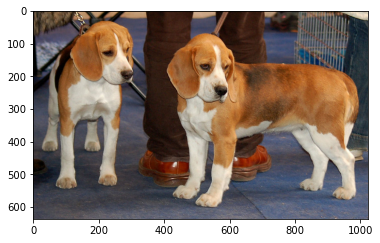

In [3]:
#讀取圖型
#1.matplotlib
import matplotlib.pyplot as plt
img = plt.imread(r'test_images\image1.jpg')
print("圖形類別:",type(img))
##高636，寬1024，3個顏色(RGB)
print("形狀:",img.shape)
plt.imshow(img)

存放的格式 <class 'numpy.ndarray'>


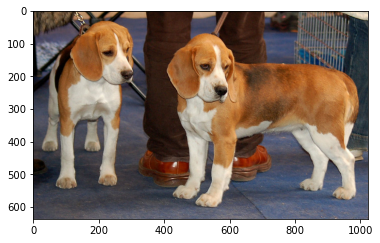

In [3]:
#2.openCV
import matplotlib.pyplot as plt
import cv2
import numpy as np
cvimg=cv2.imread(r'test_images\image1.jpg')

##轉換前(註解轉換後可看不一樣的圖)
plt.imshow(cvimg)
##cv2的色彩是BGR跟其他相反的所以要正常顯示要轉換
cvimgRGB = cv2.cvtColor(cvimg,cv2.COLOR_BGR2RGB)
##轉換後
plt.imshow(cvimgRGB)

##存放的格式
print("存放的格式",type(cvimg))



##視窗名字,檔案
cv2.imshow("hello" , cvimg)
cv2.waitKey(0)
cv2.destroyAllWindows()


轉換前圖片格式: <class 'PIL.JpegImagePlugin.JpegImageFile'>
轉換後圖片格式: <class 'numpy.ndarray'>


NameError: name 'PILing' is not defined

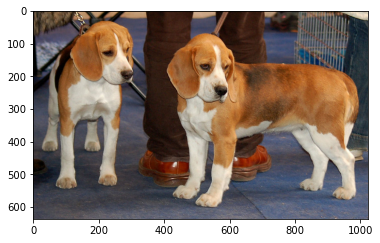

In [8]:
#3.PIL python image library
from PIL import Image
##利用np把PIL圖片格式轉NP格式
import numpy as np

PILimg = Image.open(r'test_images\image1.jpg')

##格式(與其他兩者不同)
print("轉換前圖片格式:",type(PILimg))

##把PILing轉成NP格式
imgNP = np.array(PILimg)
print("轉換後圖片格式:",type(imgNP))

plt.imshow(imgNP)
PILing.show()


In [4]:
#使用模型推理

input_tensor = tf.convert_to_tensor(cvimgRGB)
print("轉換前3維陣列:",input_tensor.shape)
input_tensor = input_tensor[tf.newaxis,...]
print("轉換後4維陣列:",input_tensor.shape)
out = model(input_tensor)
print(out)



轉換前3維陣列: (636, 1024, 3)
轉換後4維陣列: (1, 636, 1024, 3)
{'num_detections': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.], dtype=float32)>, 'detection_scores': <tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[0.9406898 , 0.93450415, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.    

檢測到的數量: tf.Tensor(2.0, shape=(), dtype=float32)
第 0 個類別是: tf.Tensor(18.0, shape=(), dtype=float32)
第 0 個準確度是: tf.Tensor(0.9406898, shape=(), dtype=float32)
第 0 個座標是: tf.Tensor([0.03908277 0.01921479 0.8721036  0.3157736 ], shape=(4,), dtype=float32)
第 1 個類別是: tf.Tensor(18.0, shape=(), dtype=float32)
第 1 個準確度是: tf.Tensor(0.93450415, shape=(), dtype=float32)
第 1 個座標是: tf.Tensor([0.10951498 0.40283597 0.9246464  0.9730481 ], shape=(4,), dtype=float32)
類型: <class 'int'>
類型: <class 'int'>


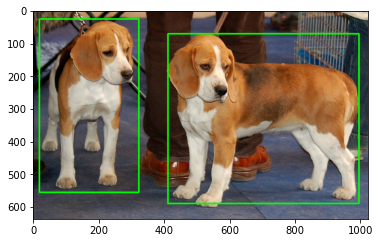

In [23]:
#匯出結果
##檢測數量 = out['num_detections'][第幾張圖片]
##檢測物件的類別 = out['detection_classes'][第幾張圖片][第幾個框檢測結果]  //如果有2個物件就選0或1
##檢測物件信心指數=out['detection_scores'][第幾張圖片][第幾個框檢測結果]
##檢測物件的框座標 = out['detection_boxes'][第幾張圖片][第幾個檢測結果][4個座標] // 4個座標為正規化(0~1)的分別為:y1,x1,y2,x2
print("檢測到的數量:",out['num_detections'][0])

for i in range(int(out['num_detections'][0])):
    print("第",i,"個類別是:",out['detection_classes'][0][i])
    print("第",i,"個準確度是:",out['detection_scores'][0][i])
    print("第",i,"個座標是:",out['detection_boxes'][0][i])
##把4個正規化的座標轉換成像素 數值X長或寬
for i in range(int(out['num_detections'][0])):
    y1 =out['detection_boxes'][0][i][0] * cvimgRGB.shape[0]
    x1 =out['detection_boxes'][0][i][1] * cvimgRGB.shape[1]
    y2 =out['detection_boxes'][0][i][2] * cvimgRGB.shape[0]
    x2 =out['detection_boxes'][0][i][3] * cvimgRGB.shape[1]
    ##把框框座標畫出來
    ##cv2.rectangle(目標圖形,起始座標,終點座標,顏色,thickness=框線寬度)
    cv2.rectangle(cvimgRGB,(int(x1),int(y1)),(int(x2),int(y2)),(0,255,0),thickness=3)
plt.imshow(cvimgRGB) 
